Step 1: Import the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os
tf.__version__
keras.__version__

'3.10.0'

Set the seed for the notebook for stable model

In [2]:
# Set the global seed value
SEED = 42

# Set the seed for reproducibility across libraries
tf.random.set_seed(SEED)

Step 2: Import a toy dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
# Import the Fashion MNIST dataset into training and testing sets
# Split the dataset into training and testing sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Step 3: Normalize and scale the toy dataset

In [4]:
# split the training set into a validation set and a training set
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Set the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



Example Image

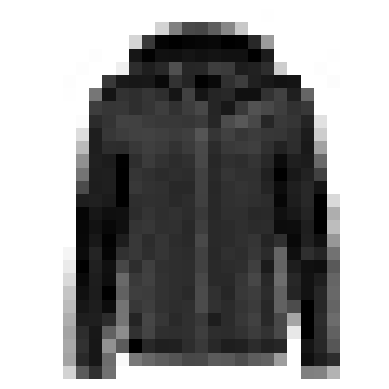

In [5]:
class_names[y_train[0]]
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [6]:
# Investigate the size of the images in the dataset
sample_image_size=X_train[0].shape
print(f"Sample size: {sample_image_size}")
# SHpe of the train set
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y train sample: {y_train[0]}")

Sample size: (28, 28)
Train set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)
Test set shape: (10000, 28, 28)
y train shape: (55000,)
y train sample: 4


Created a script to keep track of model validation accuracy and loss

In [7]:
# Create script to keep track of Model performance
log_file = "model_validation_log.csv"

# Create log file if it doesn't exist
if not os.path.exists(log_file):
    df = pd.DataFrame(columns=["Model_Name", "Timestamp", "Val_Loss", "Val_Accuracy"])
    df.to_csv(log_file, index=False)
    
def log_model_validation(model_name, val_loss, val_accuracy):
    df = pd.read_csv(log_file)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    new_row = {
        "Model_Name": model_name,
        "Timestamp": timestamp,
        "Val_Loss": round(val_loss, 4),
        "Val_Accuracy": round(val_accuracy, 4)
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv(log_file, index=False)
    print(f"✅ Logged: {model_name} — Val Acc: {val_accuracy:.4f}, Val Loss: {val_loss:.4f}")


Step 4: Describe the shape of the NN

### Naming Convention for models established to keep track of changes:

D3_ReLU_Adam_LR0.001_HN_DR0.3

Would mean:

- 3 Dense layers

- ReLU activation

- Adam optimizer with learning rate 0.001

- He Normal initializer

- Dropout rate of 0.3



| Abbreviation          | Description                                                               |
| --------------------- | ------------------------------------------------------------------------- |
| `D1`, `D2`, `D3`, ... | Number of **Dense** layers (e.g., `D3` = 3 Dense layers)                  |
| `ReLU`                | **ReLU** activation used in hidden layers                                 |
| `Sigmoid`             | **Sigmoid** activation used in hidden layers                              |
| `Tanh`                | **Tanh** activation used in hidden layers                                 |
| `Softmax`             | **Softmax** activation in output layer (implied for classification tasks) |
| `SGD`                 | **Stochastic Gradient Descent** optimizer                                 |
| `Adam`                | **Adam** optimizer                                                        |
| `RMSprop`             | **RMSprop** optimizer                                                     |
| `LRx.xx`              | Learning Rate used in the optimizer (e.g., `LR0.001`)                     |
| `DRx`                 | **Dropout Rate** used (e.g., `DR0.3` = dropout of 30%)                    |
| `HN`                  | **He Normal** weight initialization (good with ReLU)                      |
| `XG`                  | **Xavier Glorot** initialization (default in Keras for Dense layers)      |
| `BN`                  | **Batch Normalization** layer used                                        |
| `TS`                  | **Tanh-Sigmoid** hybrid activation setup                                  |
| `TSx`                 | Number of **training steps/epochs** (optional, e.g., `TS30`)              |


In [8]:
model_name = "D3_ReLU_SGD_LR0.01_XG"


model0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/envs/appliedmlclass/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Print and describe model shape of the NN

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

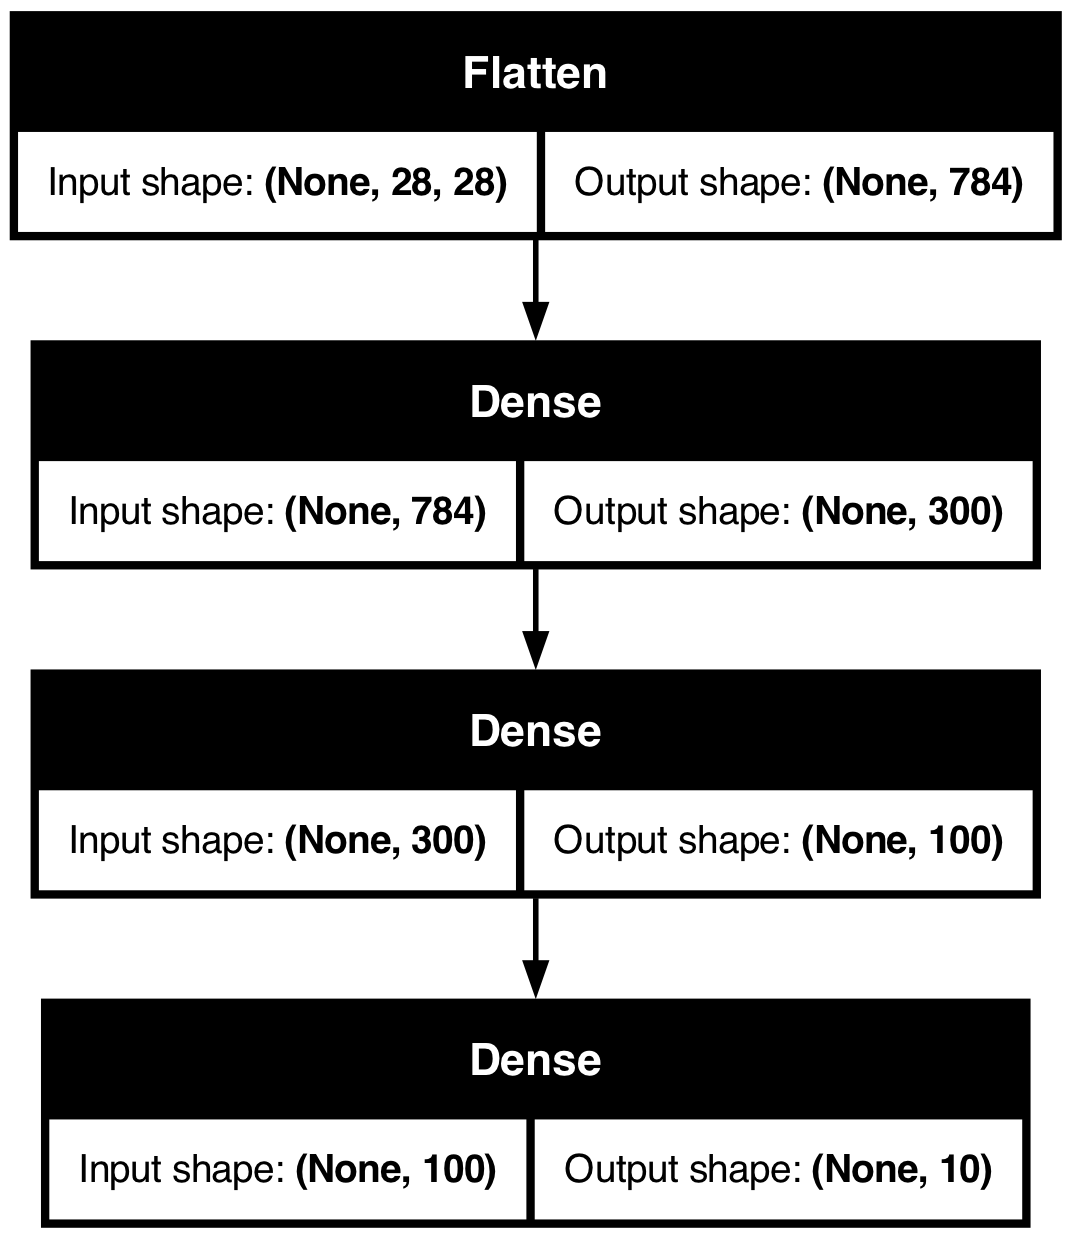

In [9]:
model0.summary()
keras.utils.plot_model(model0, "erins_fashion_mnist_model.png", show_shapes=True)

More example images

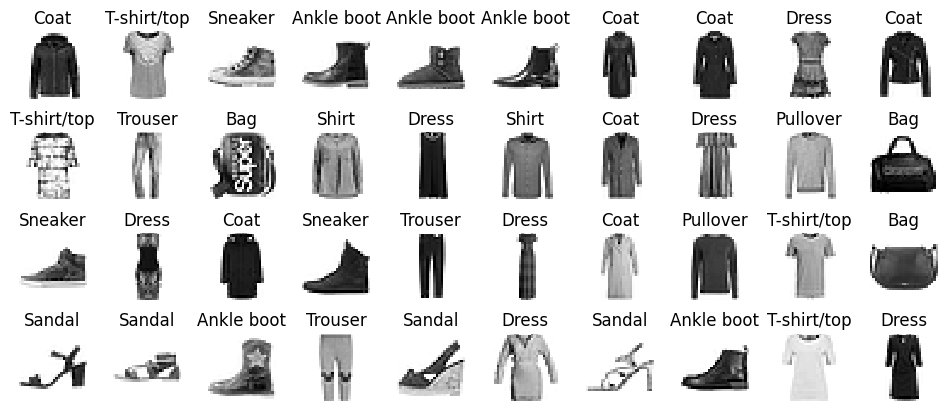

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Step 5: Tell it which optimizer, the loss to minimize, and the metrics to measure

In [11]:
model0.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Step 6: Fit the model, keeping track of validation loss

In [12]:
history = model0.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6906 - loss: 0.9715 - val_accuracy: 0.8248 - val_loss: 0.5154
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8243 - loss: 0.4989 - val_accuracy: 0.8438 - val_loss: 0.4504
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8431 - loss: 0.4459 - val_accuracy: 0.8568 - val_loss: 0.4162
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8533 - loss: 0.4160 - val_accuracy: 0.8618 - val_loss: 0.3943
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8605 - loss: 0.3948 - val_accuracy: 0.8656 - val_loss: 0.3794
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3782 - val_accuracy: 0.8710 - val_loss: 0.3678
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.8706 - loss: 0.3645 - val_accuracy: 0.8716 - val_loss: 0.3572
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.8744 - loss: 0.352

In [13]:
# Get final validation loss and accuracy
val_loss = history.history["val_loss"][-1]
val_accuracy = history.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name, val_loss, val_accuracy)

✅ Logged: D3_ReLU_SGD_LR0.01_XG — Val Acc: 0.8922, Val Loss: 0.3006


Step 7: Plot learning curves

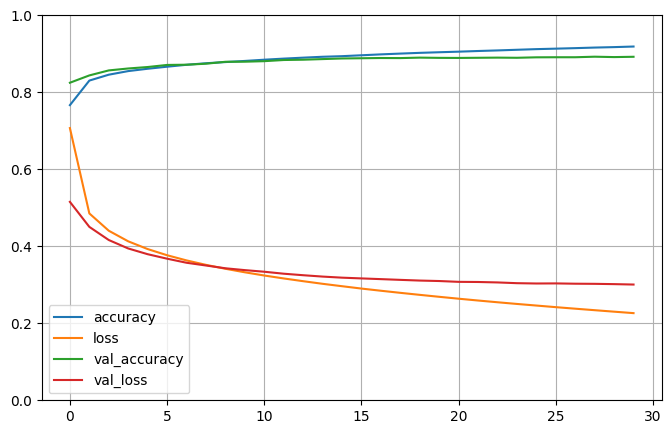

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

Step 8: Evaluate the trained model on testing data(Delayed this step until )

Apply the following changes to the model and record the model with the highest accuracy. Explain the changes you made and why you think they improved the model.
- change layers
- change optimization
- change initialization
- change nonlinear function
- add regularization

For each model, the following naming convention should be used:


## First Change: Change layers

Here I have decided to change the number of layers in my model by adding another hidden layer with 64 neurons and changing the number of neurons in the second hidden layer to 128. In general, adding more layers and neurons can help the model learn more complex patterns in the data, which may lead to better performance. However it is important to monitor the model's performance on the validation set to avoid overfitting.

In [15]:
model_name1 = "D4_ReLU_SGD_LR0.01_XG"
# Describe the shape of the sequential NN with change to number of layers
model1 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,934 (1.08 MB)

 Trainable params: 282,934 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

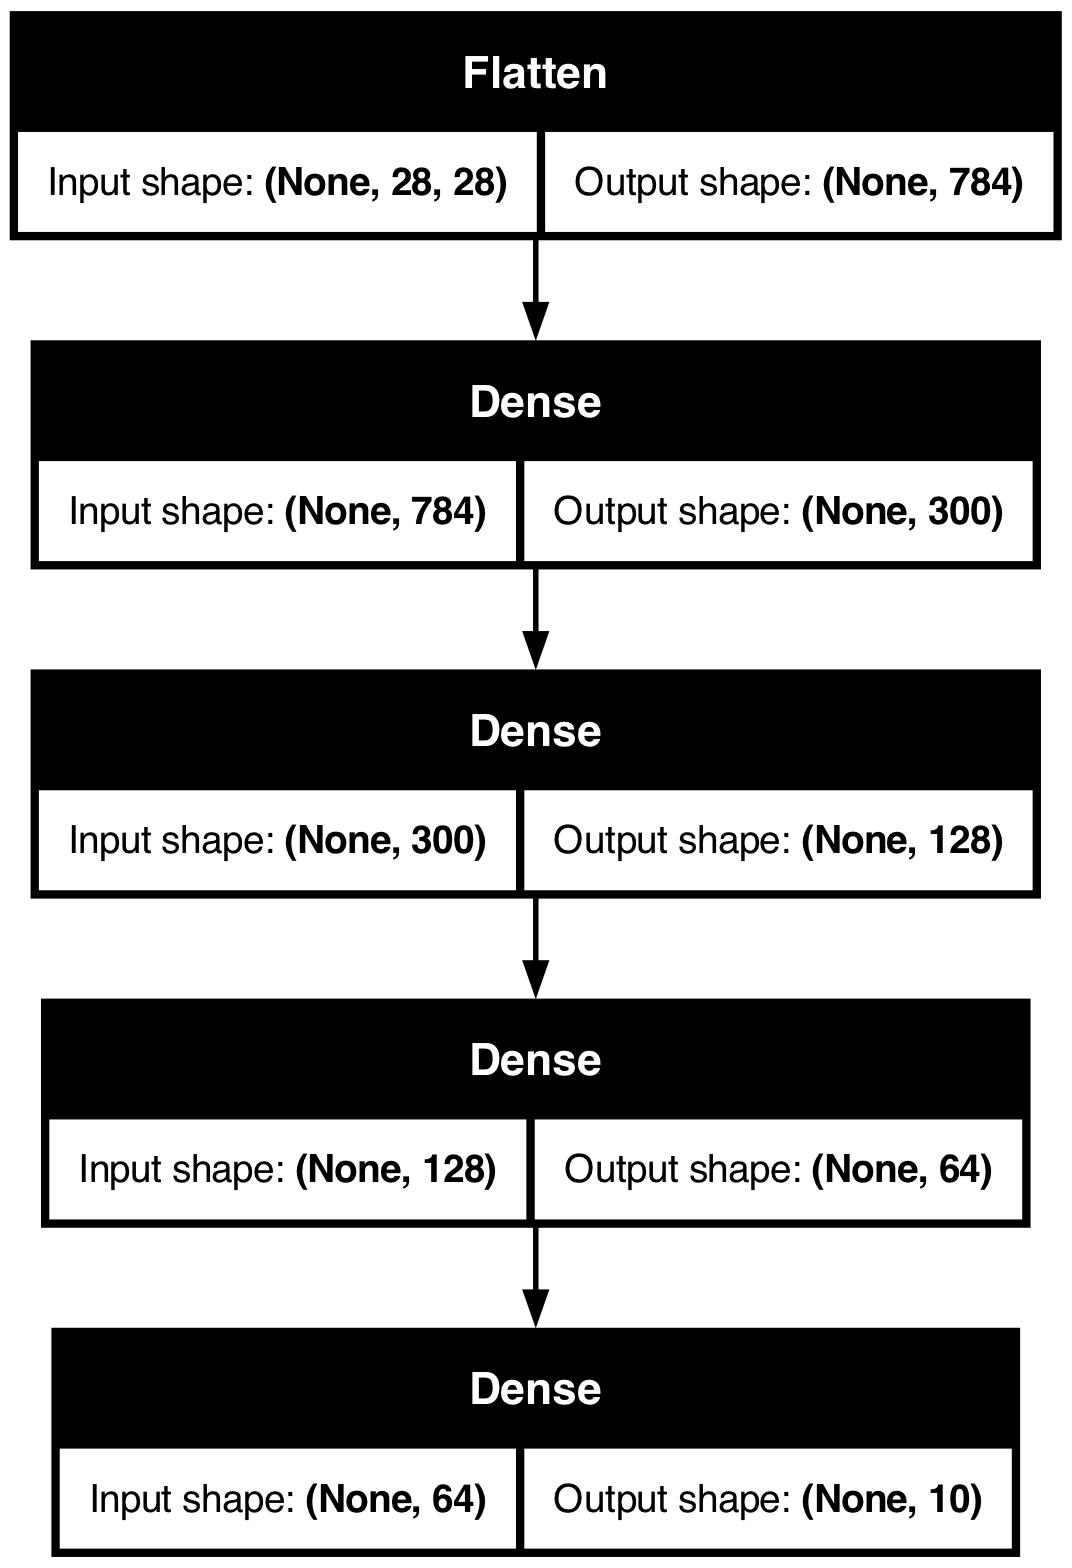

In [16]:
model1.summary()
keras.utils.plot_model(model1, "erins_fashion_mnist_model1.png", show_shapes=True)

Kept same optimizer, loss, and metrics as before.

In [17]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6615 - loss: 1.0475 - val_accuracy: 0.8004 - val_loss: 0.5707
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8228 - loss: 0.4961 - val_accuracy: 0.8378 - val_loss: 0.4724
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8437 - loss: 0.4387 - val_accuracy: 0.8510 - val_loss: 0.4300
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4063 - val_accuracy: 0.8616 - val_loss: 0.4025
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8621 - loss: 0.3833 - val_accuracy: 0.8682 - val_loss: 0.3823
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8686 - loss: 0.3651 - val_accuracy: 0.8696 - val_loss: 0.3706
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8728 - loss: 0.3499 - val_accuracy: 0.8696 - val_loss: 0.3604
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8774 - loss: 0.3368 - 

In [19]:
# Get final validation loss and accuracy
val_loss = history1.history["val_loss"][-1]
val_accuracy = history1.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name1, val_loss, val_accuracy)

✅ Logged: D4_ReLU_SGD_LR0.01_XG — Val Acc: 0.8876, Val Loss: 0.3180


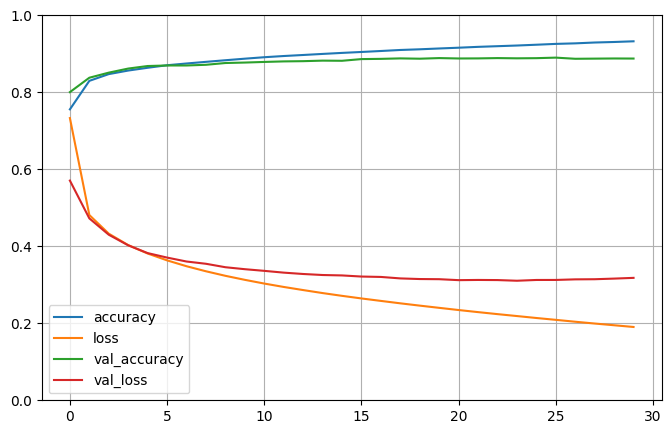

In [20]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot1")
plt.show()

Slight increase in validation accuracy and decrease in validation loss compared to the original model, indicating that the changes made only slightly improves the model's performance.

## Change 2: Change Optimizer

Here i decided to change the optimizer from SGD to Adam. 

Adam(Adaptive movement estimation), in general:
- Faster convergence compared to SGD
- May overfit

In [21]:
model_name2 = "D3_ReLU_Adam_LR0.001_XG"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model2 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

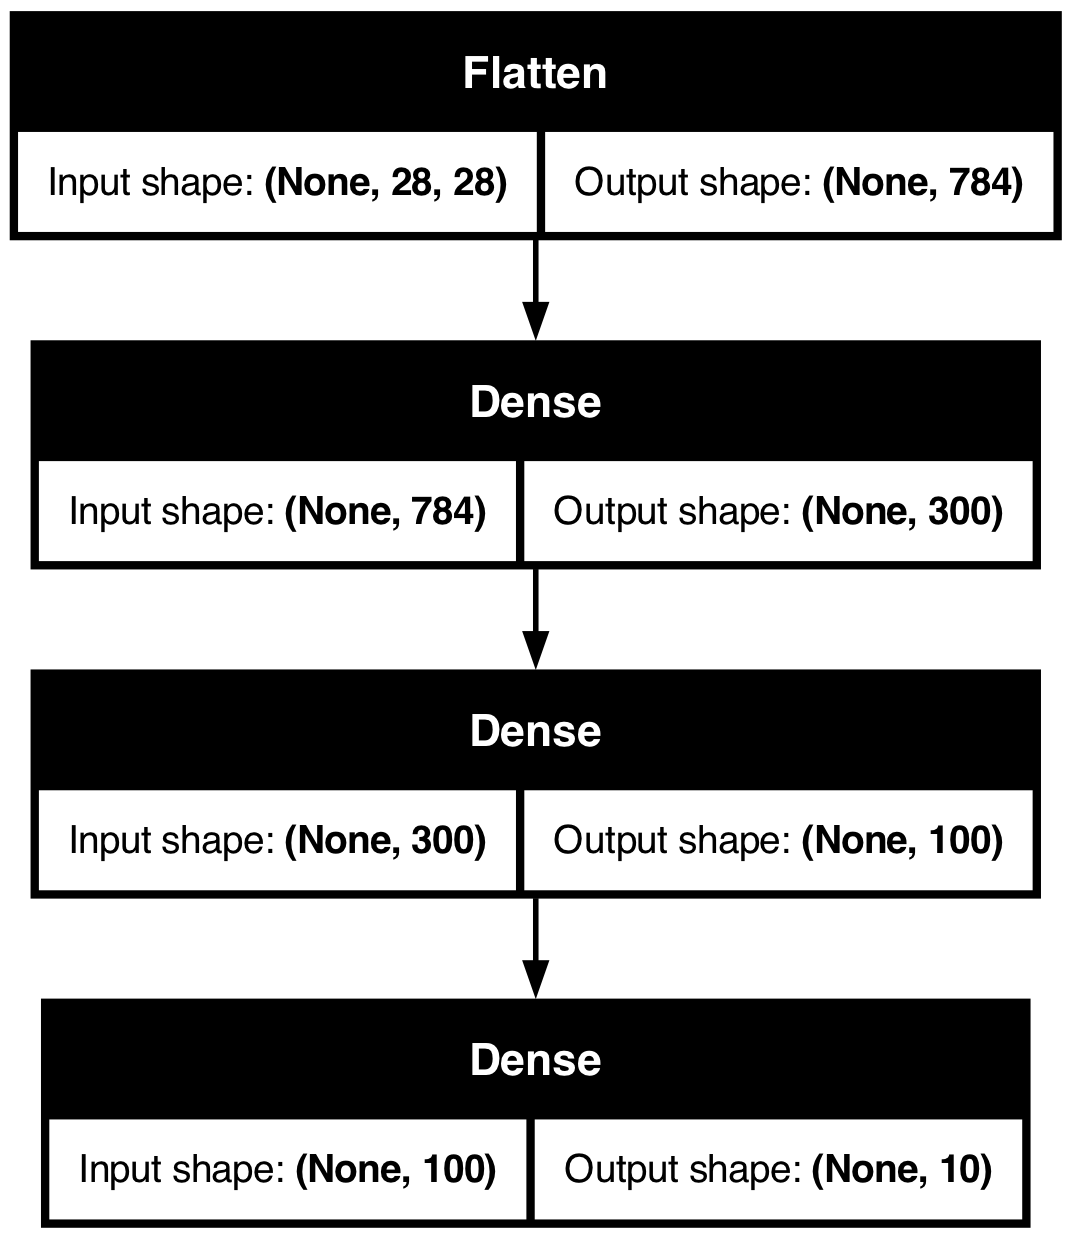

In [22]:
model2.summary()
keras.utils.plot_model(model2, "erins_fashion_mnist_model2.png", show_shapes=True)

In [23]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [24]:
# Fit the model with the new optimizer
history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7767 - loss: 0.6224 - val_accuracy: 0.8672 - val_loss: 0.3672
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8592 - loss: 0.3767 - val_accuracy: 0.8802 - val_loss: 0.3342
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.3330 - val_accuracy: 0.8818 - val_loss: 0.3258
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8862 - loss: 0.3045 - val_accuracy: 0.8878 - val_loss: 0.3130
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8946 - loss: 0.2850 - val_accuracy: 0.8908 - val_loss: 0.3027
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9002 - loss: 0.2673 - val_accuracy: 0.8942 - val_loss: 0.3032
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 0.2554 - val_accuracy: 0.8896 - val_loss: 0.3146
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9102 - loss: 0.2409 - 

In [25]:
# Get final validation loss and accuracy
val_loss = history2.history["val_loss"][-1]
val_accuracy = history2.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name2, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG — Val Acc: 0.8952, Val Loss: 0.4816


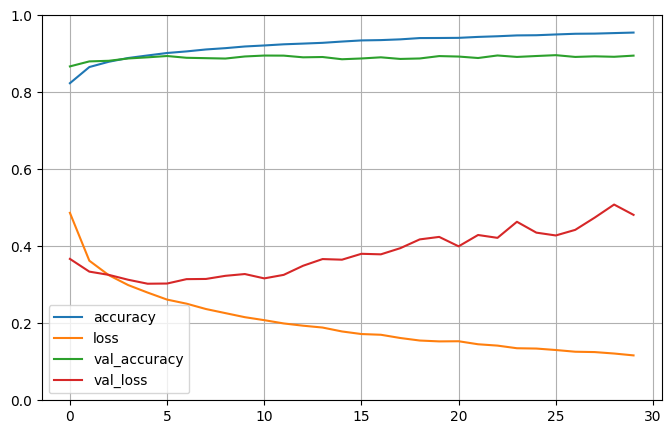

In [26]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot2")
plt.show()

The large gap between training and validation accuracy suggests that the model may be overfitting to the training data. For next change add regularization using dropout layers to help reduce overfitting.

## Change 3: Change Optimizer + Add Regularization

Previously the optimizer was changed from SGD to Adam to improve accuracy however, the model was overfitting to the training data. Now, I have :

- Added dropout layers to the model to help reduce overfitting. Dropout rate = 0.2 (20% of the neurons in the dropout layer will be randomly set to zero during training). This helps prevent overfitting by reducing the reliance on specific neurons and encouraging the model to learn more robust features.
- Kept the Adam optimizer with a learning rate of 0.001.
- Started with a dropout rate of 0.3 but reduced it to 0.2 because of large drop in accuracy

In [27]:
model_name3 = "D3_ReLU_Adam_LR0.001_XG_DR0.2"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model3 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

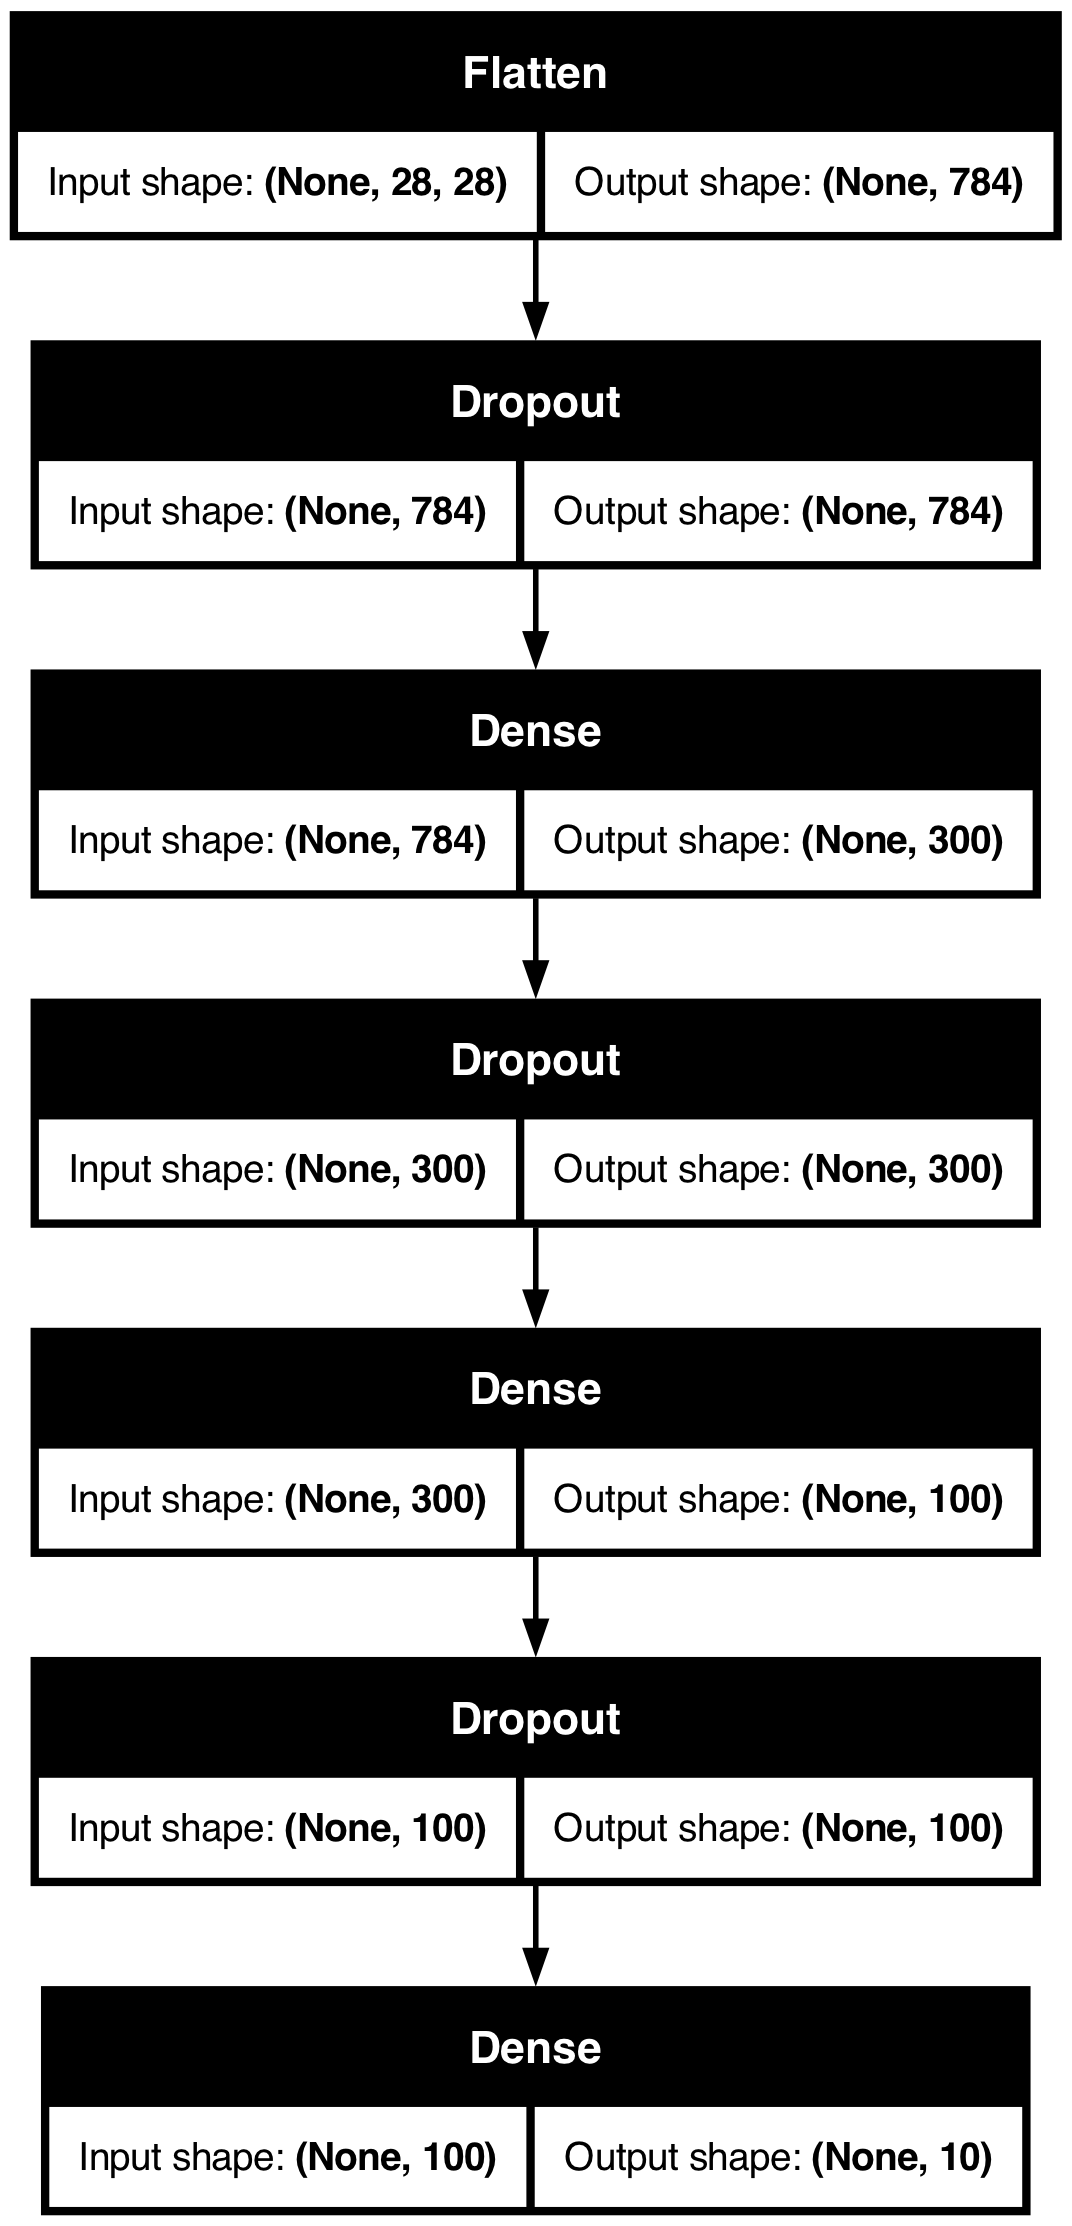

In [28]:
model3.summary()
keras.utils.plot_model(model3, "erins_fashion_mnist_model3.png", show_shapes=True)

In [29]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
# Fit the model with the new optimizer
history3 = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7332 - loss: 0.7399 - val_accuracy: 0.8532 - val_loss: 0.4021
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8320 - loss: 0.4602 - val_accuracy: 0.8664 - val_loss: 0.3626
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8446 - loss: 0.4176 - val_accuracy: 0.8674 - val_loss: 0.3534
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8523 - loss: 0.4002 - val_accuracy: 0.8740 - val_loss: 0.3437
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.3788 - val_accuracy: 0.8808 - val_loss: 0.3267
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8630 - loss: 0.3697 - val_accuracy: 0.8806 - val_loss: 0.3213
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8675 - loss: 0.3572 - val_accuracy: 0.8898 - val_loss: 0.3083
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3479 - 

In [31]:
# Get final validation loss and accuracy
val_loss = history3.history["val_loss"][-1]
val_accuracy = history3.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name3, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG_DR0.2 — Val Acc: 0.8970, Val Loss: 0.2863


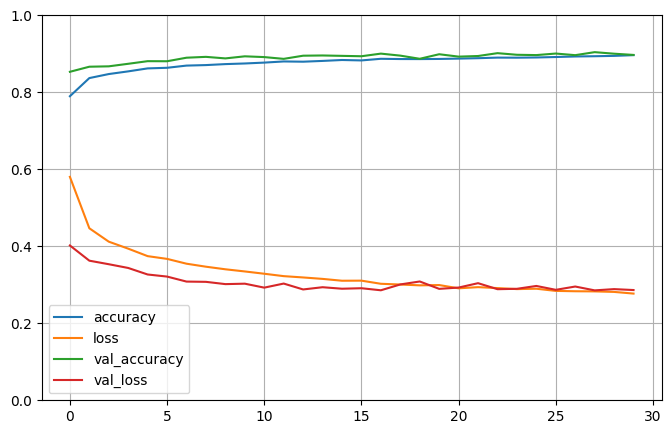

In [32]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot3")
plt.show()

## Change 4: Change Optimizer + Add Regularization + Train Longer(50 epochs)

Previously the model was trained for 30 epochs. To further improve performance, I will train the model for 50 epochs while monitoring the validation loss and accuracy. Also include EarlyStopping to prevent overfitting.


In [33]:
model_name4 = "D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model4 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

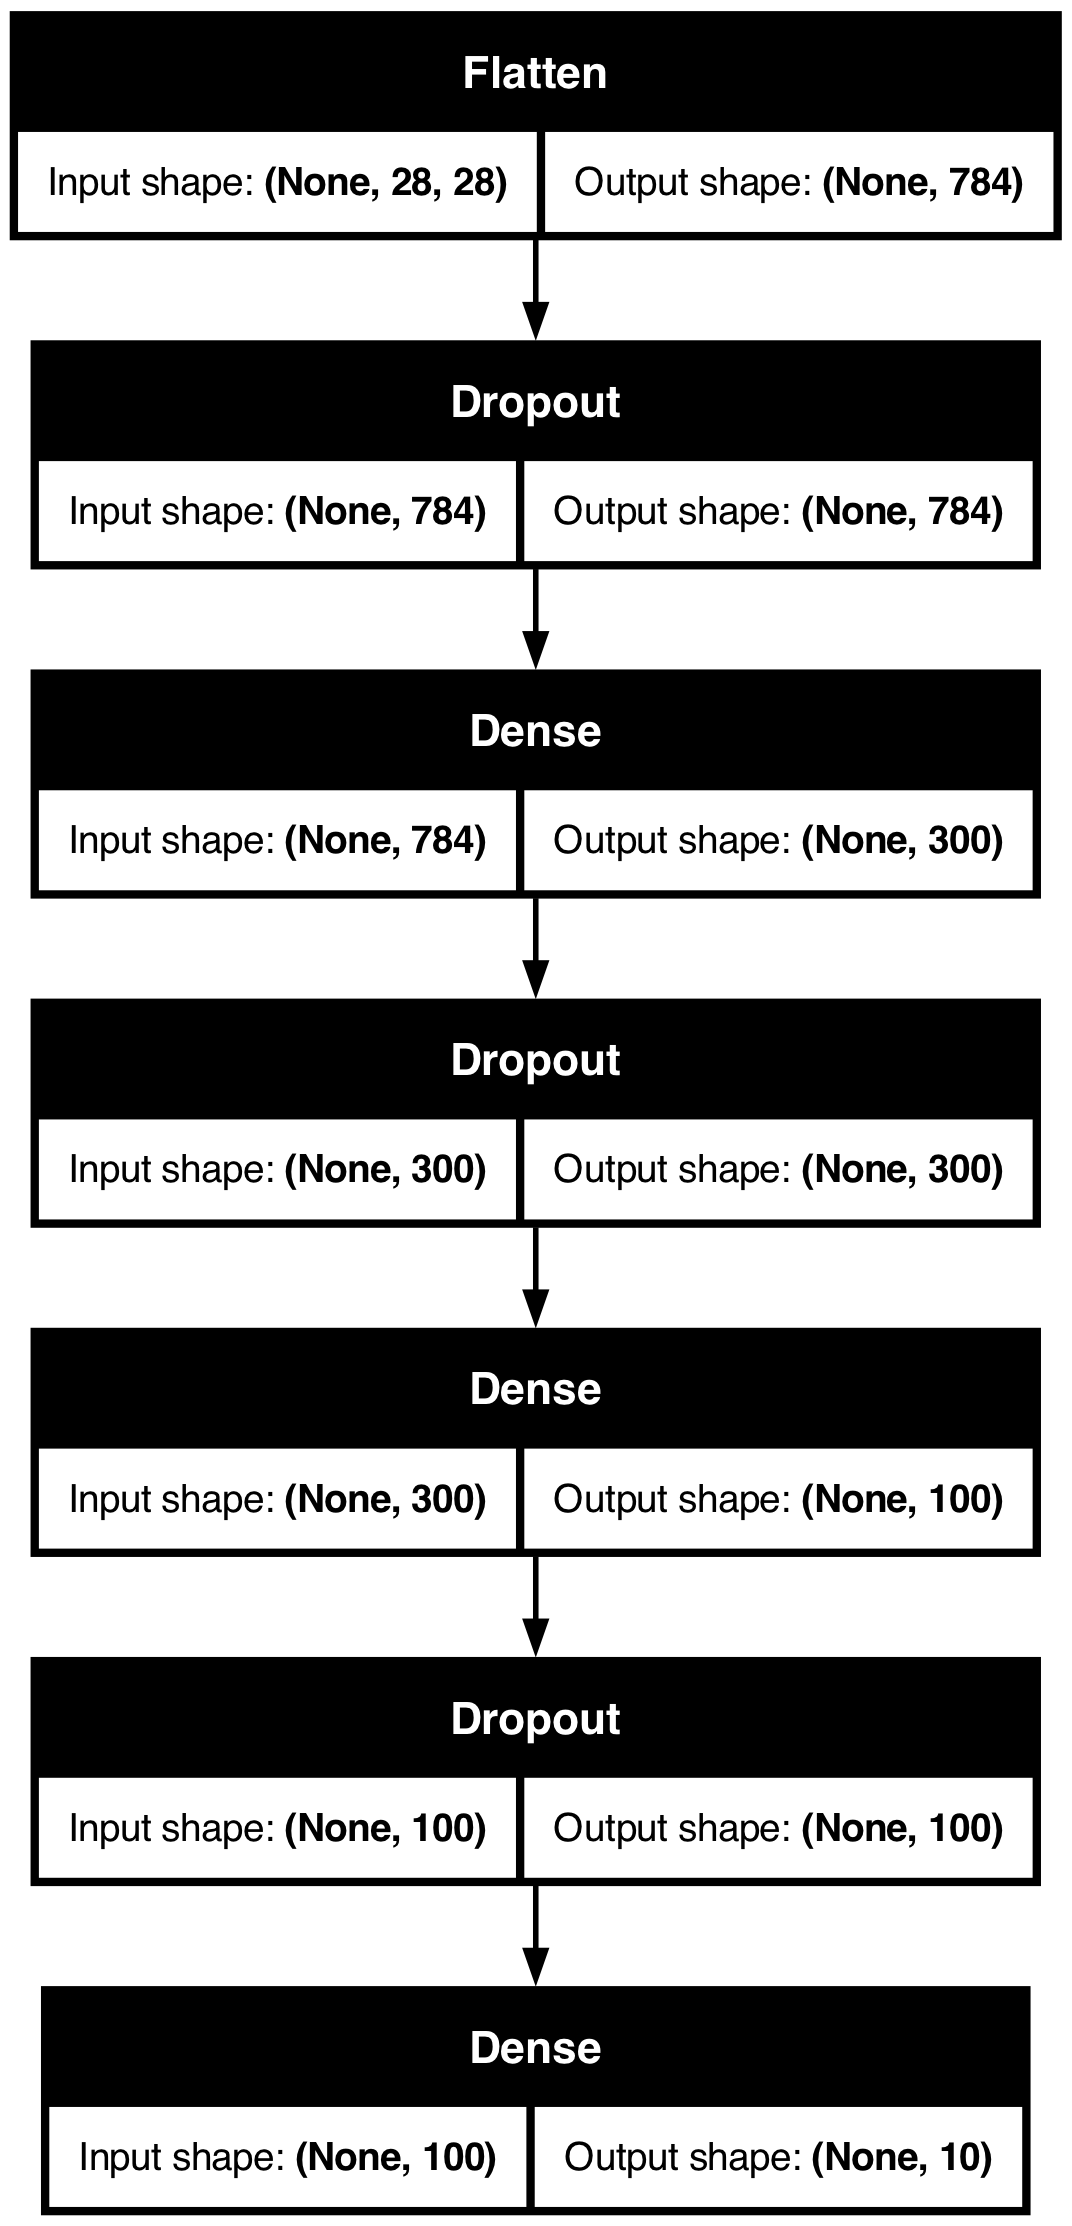

In [34]:
model4.summary()
keras.utils.plot_model(model4, "erins_fashion_mnist_model4.png", show_shapes=True)

In [35]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
# Fit the model with the new optimizer
# Train the model for 50 epochs and include EarlyStopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history4 = model4.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7358 - loss: 0.7402 - val_accuracy: 0.8590 - val_loss: 0.4030
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8282 - loss: 0.4679 - val_accuracy: 0.8698 - val_loss: 0.3641
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4212 - val_accuracy: 0.8732 - val_loss: 0.3413
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4011 - val_accuracy: 0.8772 - val_loss: 0.3370
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8558 - loss: 0.3859 - val_accuracy: 0.8862 - val_loss: 0.3224
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.3677 - val_accuracy: 0.8868 - val_loss: 0.3200
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8677 - loss: 0.3569 - val_accuracy: 0.8924 - val_loss: 0.3091
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3525 - 

In [37]:
# Get final validation loss and accuracy
val_loss = history4.history["val_loss"][-1]
val_accuracy = history4.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name4, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50 — Val Acc: 0.8982, Val Loss: 0.2885


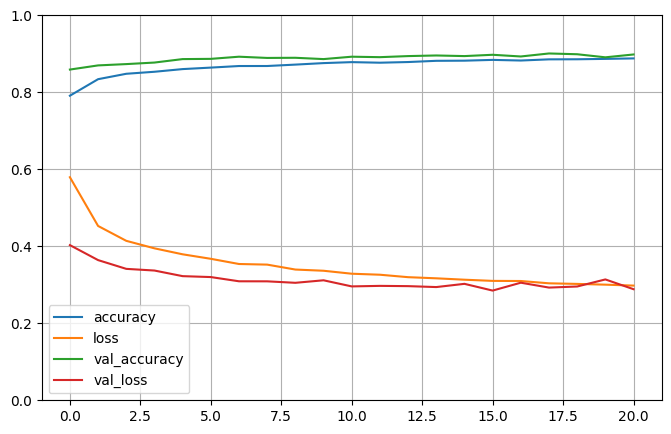

In [38]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot4")
plt.show()

## Change 5: Same Optimizer (SGD) + Add Regularization(Dropout Rate 0.2) 
- Same optimizer SGD 
- Kept the SGD optimizer with a learning rate of 0.001.
- Dropout rate of 0.2.
- Include EarlyStopping to prevent overfitting.

In [39]:
model_name5 = "D3_ReLU_SGD_LR0.001_XG_DR0.2"

# Describe the shape of the sequential NN with change to optimizer, now using SGD
model5 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

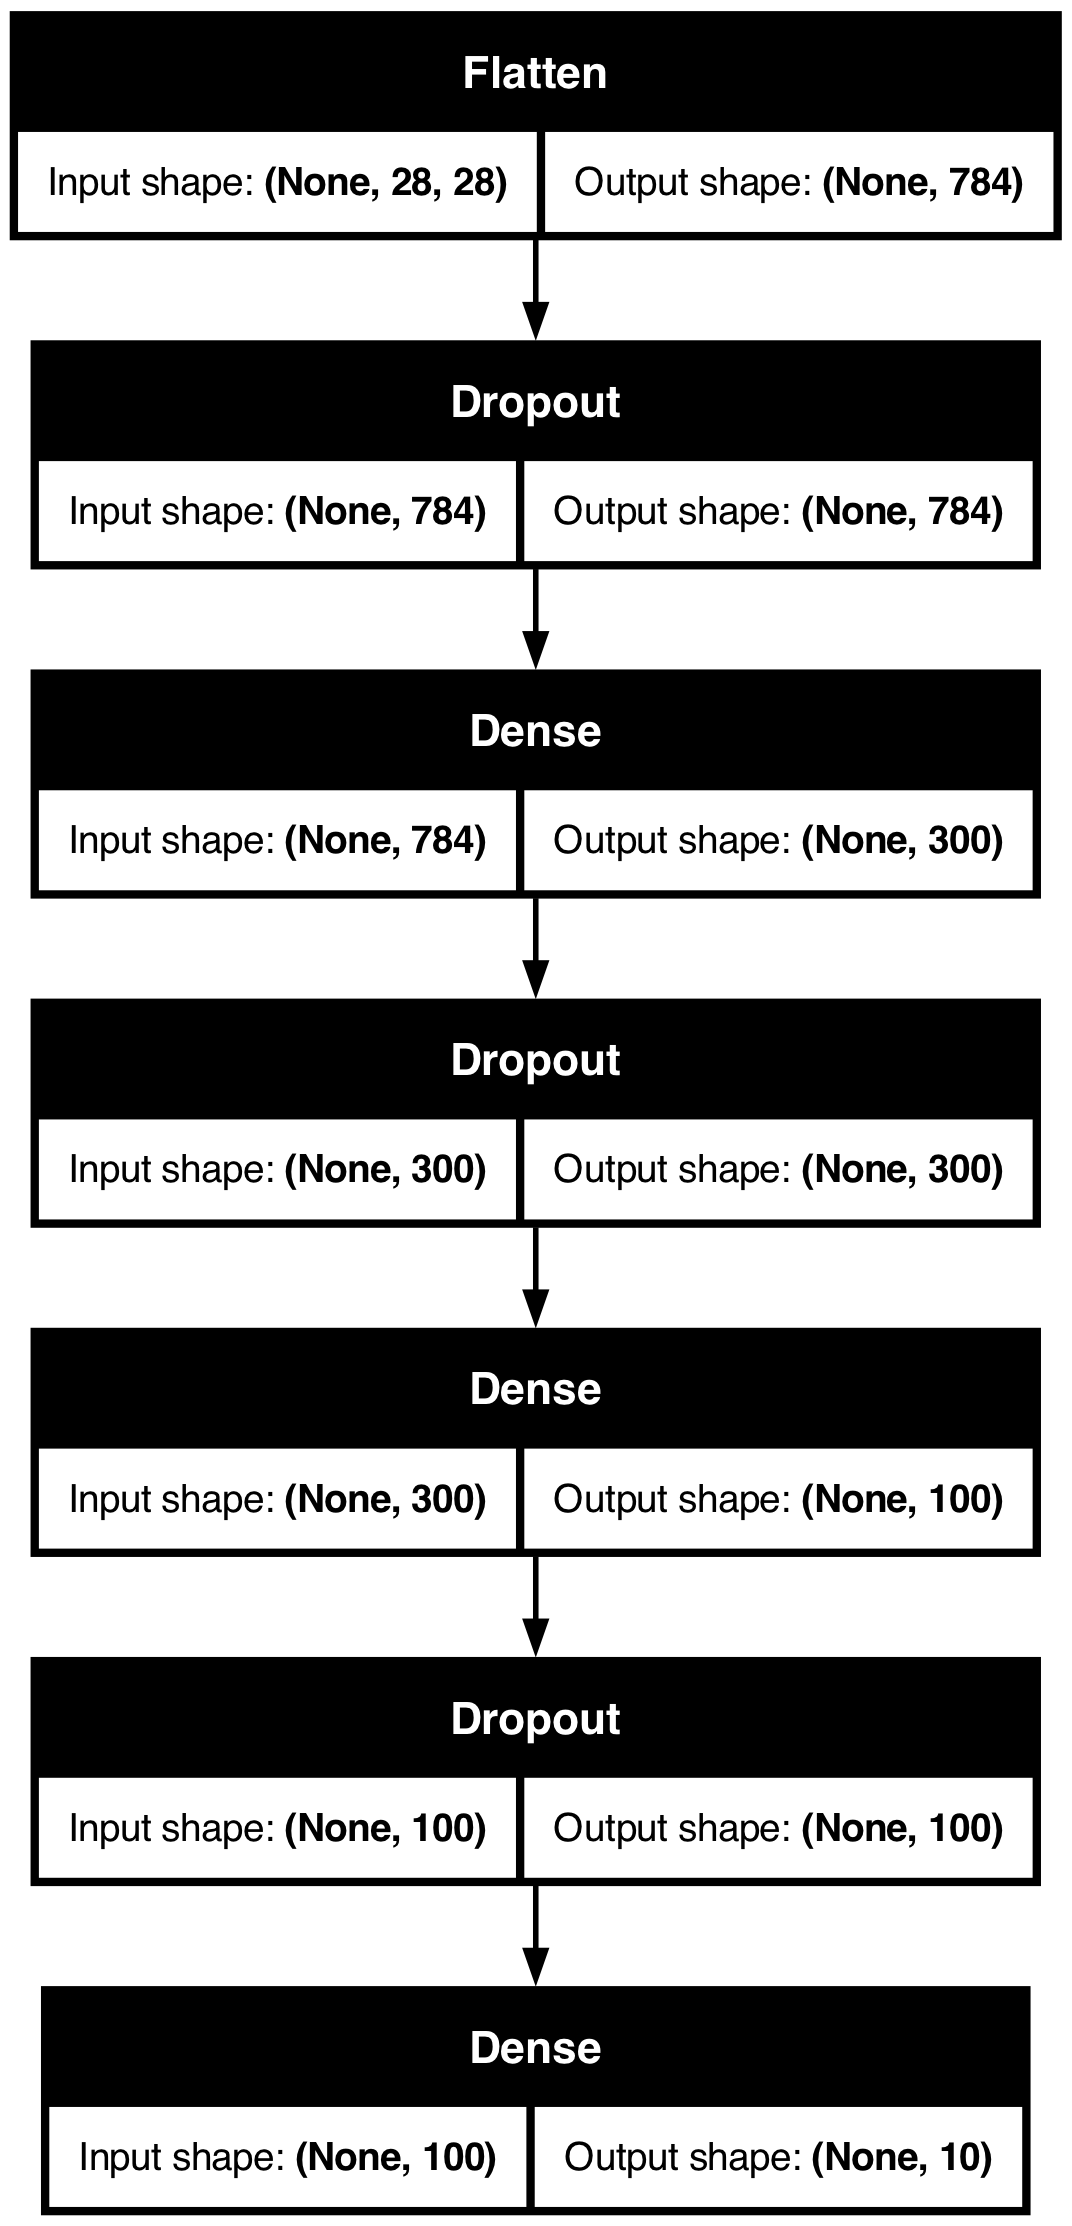

In [40]:
model5.summary()
keras.utils.plot_model(model5, "erins_fashion_mnist_model5.png", show_shapes=True)

In [41]:
# Describe the shape of the sequential NN with change to optimizer, now using SGD
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [42]:
# Fit the model with the new optimizer
history5 = model5.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5791 - loss: 1.2062 - val_accuracy: 0.8078 - val_loss: 0.5561
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7685 - loss: 0.6465 - val_accuracy: 0.8342 - val_loss: 0.4881
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7945 - loss: 0.5744 - val_accuracy: 0.8472 - val_loss: 0.4528
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8107 - loss: 0.5317 - val_accuracy: 0.8548 - val_loss: 0.4275
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8194 - loss: 0.5077 - val_accuracy: 0.8594 - val_loss: 0.4125
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8229 - loss: 0.4915 - val_accuracy: 0.8612 - val_loss: 0.3987
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8276 - loss: 0.4736 - val_accuracy: 0.8660 - val_loss: 0.3872
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8343 - loss: 0.4594 - 

In [43]:
# Get final validation loss and accuracy
val_loss = history5.history["val_loss"][-1]
val_accuracy = history5 .history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name5, val_loss, val_accuracy)

✅ Logged: D3_ReLU_SGD_LR0.001_XG_DR0.2 — Val Acc: 0.8882, Val Loss: 0.3085


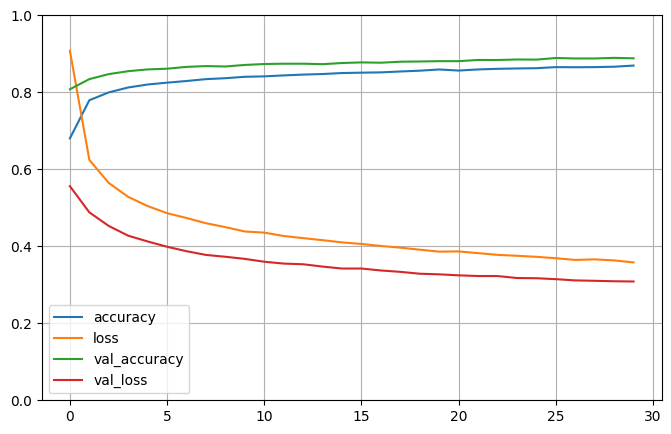

In [44]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot5")
plt.show()

## CONCLUSION 

In this notebook, I have made several changes to the model architecture, optimizer, and regularization techniques to improve the model's performance on the Fashion MNIST dataset. 

The model chosen for the final evaluation with the test set was model, D3_ReLU_Adam_LR0.001_XG_DR0.2, which had the highest validation accuracy of 90.02% and a moderate validation loss of 0.2947. 

By examining the plot of the training and validation accuracy for the second model, D3_ReLU_Adam_LR0.001_XG (with the second highest validation accuracy, 89.54%), seems to be overfitting to the training data. So the Model from change 3 was chosen for it balance between validation accuracy and loss.




In [50]:
log_df = pd.read_csv("model_validation_log.csv")
log_df.sort_values(by="Val_Accuracy", ascending=False)


,Model_Name,Timestamp,Val_Loss,Val_Accuracy
4,D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50,2025-07-22 13:49:18,0.2885,0.8982
3,D3_ReLU_Adam_LR0.001_XG_DR0.2,2025-07-22 13:48:12,0.2863,0.8970
2,D3_ReLU_Adam_LR0.001_XG,2025-07-22 13:46:38,0.4816,0.8952
0,D3_ReLU_SGD_LR0.01_XG,2025-07-22 13:44:09,0.3006,0.8922
5,D3_ReLU_SGD_LR0.001_XG_DR0.2,2025-07-22 13:50:24,0.3085,0.8882
1,D4_ReLU_SGD_LR0.01_XG,2025-07-22 13:45:12,0.3180,0.8876


From Left to right: Original Model (keras_learning_curves_plot.png), D3_ReLU_Adam_LR0.001_XG (keras_learning_curves_plot2.png), D3_ReLU_Adam_LR0.001_XG_DR0.2 (keras_learning_curves_plot3.png)

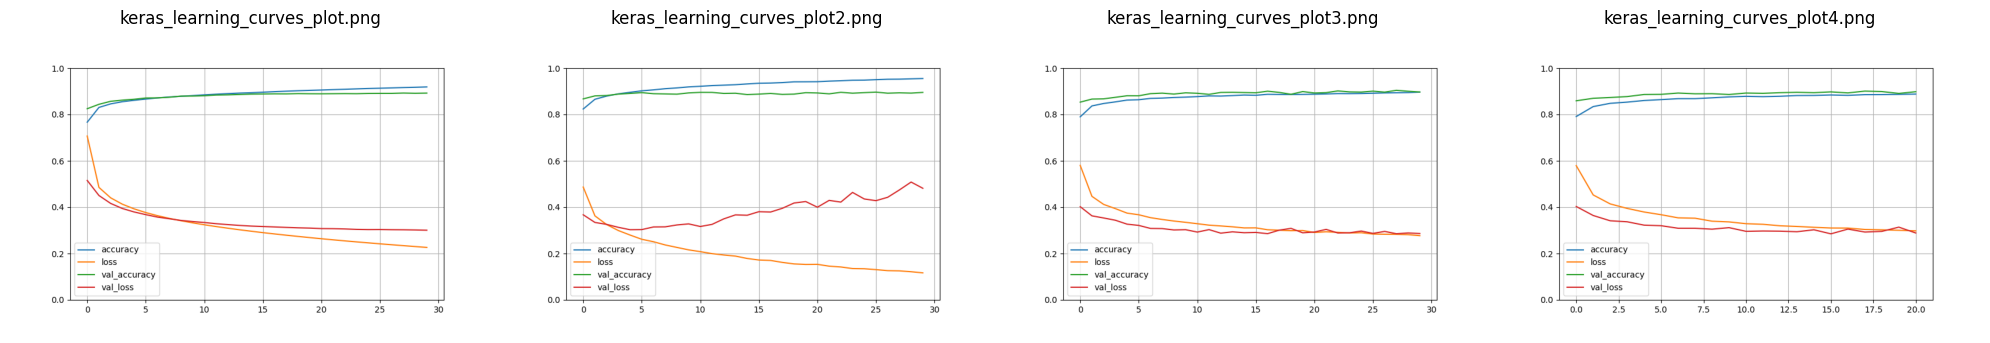

In [59]:
import matplotlib.image as mpimg

# List of saved plot image filenames
image_files = [
    "keras_learning_curves_plot.png",
    "keras_learning_curves_plot2.png",
    "keras_learning_curves_plot3.png",
    "keras_learning_curves_plot4.png"
]

# Number of images
n = len(image_files)

# Display side by side
fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

# If only one image, make axes a list
if n == 1:
    axes = [axes]

for ax, image_file in zip(axes, image_files):
    img = mpimg.imread(image_file)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(image_file)

plt.tight_layout()
plt.show()


Step 8: Evaluate the trained model on testing data(Delayed this step until after making chnages and recording the model with the highest accuracy)

As seen in the evaluation results, Model3 outperforms the other models in terms of validation accuracy and loss. The optimizer used in Model3 is Adam with regularization (dropout rate of 0.2) and a learning rate of 0.001. The model has a validation accuracy of 90.02% and a validation loss of 0.2947, indicating that it generalizes well to unseen data.

In [47]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8870 - loss: 0.3171


[0.32019343972206116, 0.8877000212669373]

In [48]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8813 - loss: 0.5151


[0.5151368379592896, 0.8831999897956848]

In [49]:
model0.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8791 - loss: 0.3435


[0.3393171727657318, 0.880299985408783]

In [61]:
model4.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8812 - loss: 0.3248


[0.32428258657455444, 0.883899986743927]